In [22]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt


In [23]:
# Load movie data into a dataframe from the csv file
movies = './movies.csv'
ratings = './ratings.csv'

movies = pd.read_csv(movies)
ratings = pd.read_csv(ratings)

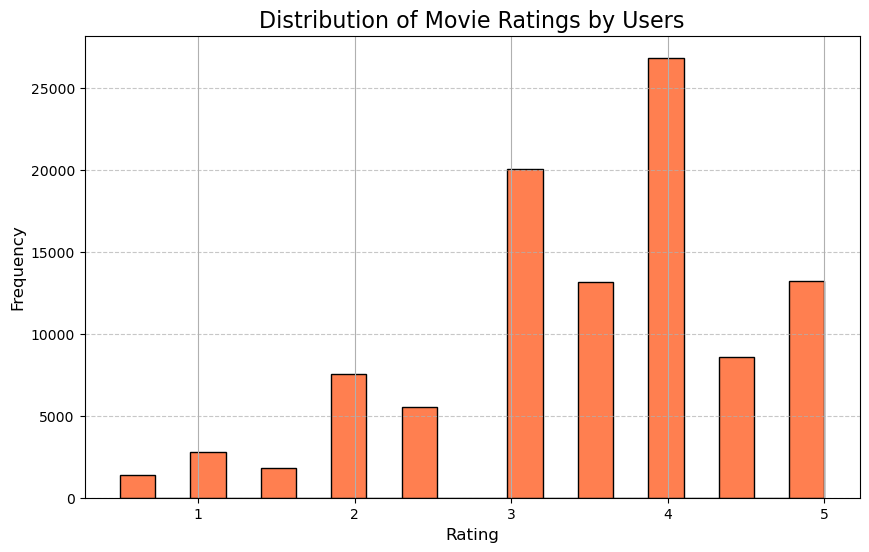

In [24]:
from pandas.plotting import scatter_matrix

# Create a bar chart showing the distribution of ratings for movies
plt.figure(figsize=(10, 6))  
ratings['rating'].hist(bins=20, color='coral', edgecolor='black')  
plt.title('Distribution of Movie Ratings by Users', fontsize=16)  
plt.xlabel('Rating', fontsize=12)  
plt.ylabel('Frequency', fontsize=12)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()


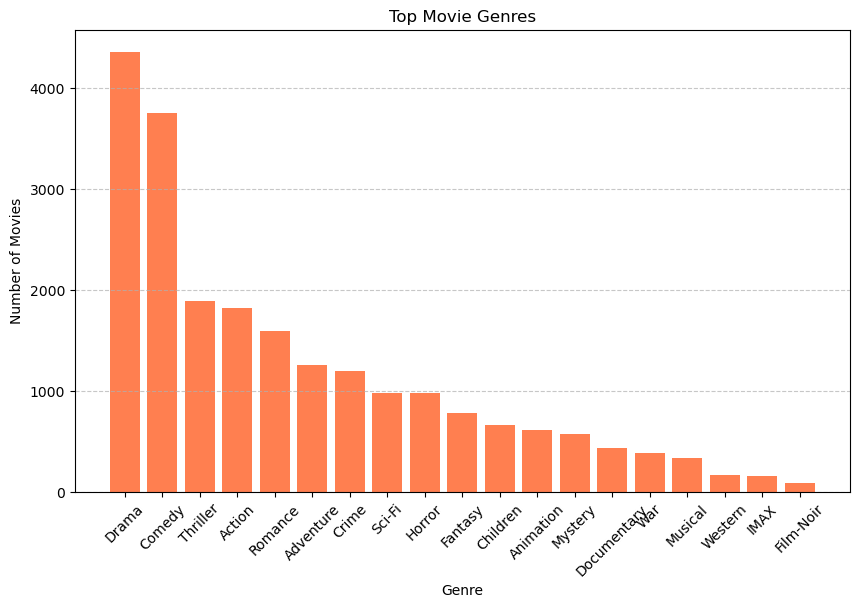

In [25]:
from collections import Counter

# This counts how frequent each genre appears in the dataset
genre_count = Counter(
    genre for sublist in movies['genres'].str.split('|') for genre in sublist if genre != "(no genres listed)"
)

genre_df = pd.DataFrame(genre_count.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

# Create a bar chart showing the distribution of movie genres in the dataset
plt.figure(figsize=(10, 6))
plt.bar(genre_df['Genre'], genre_df['Count'], color='coral')
plt.title('Top Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


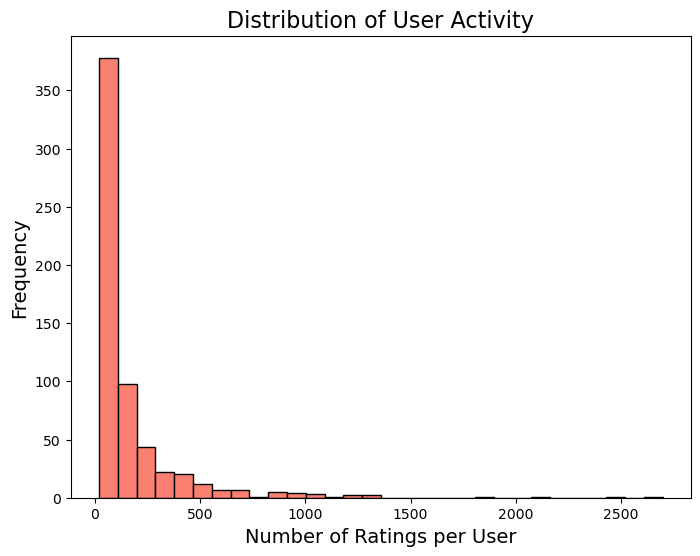

In [26]:
user_activity = ratings.groupby('userId')['rating'].count()

# Histogram
plt.figure(figsize=(8, 6))
user_activity.plot(kind='hist', bins=30, color='salmon', edgecolor='black')
plt.title('Distribution of User Activity', fontsize=16)
plt.xlabel('Number of Ratings per User', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

In [27]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [28]:
import re 

# Data will be cleaned through the format_title function
def format_title(title):
    return re.sub("[^a-zA-Z0-9 ]", "", title)

In [29]:
movies["format_title"] = movies["title"].apply(format_title)

In [30]:
movies

,movieId,title,genres,format_title
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story 1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,Jumanji 1995
2,3,Grumpier Old Men (1995),Comedy|Romance,Grumpier Old Men 1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Waiting to Exhale 1995
4,5,Father of the Bride Part II (1995),Comedy,Father of the Bride Part II 1995
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,Black Butler Book of the Atlantic 2017
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,No Game No Life Zero 2017
9739,193585,Flint (2017),Drama,Flint 2017
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,Bungo Stray Dogs Dead Apple 2018


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Data will be vectorized so that we can use cosine similarity for results
vectorizer = TfidfVectorizer(ngram_range=(1,2))

tfidf = vectorizer.fit_transform(movies["format_title"])

In [32]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Cosine similarity will allow us to compute similarity between terms that are entered
def search(title):
    title = format_title(title)
    query_vec = vectorizer.transform([title])
    similarity = cosine_similarity(query_vec, tfidf).flatten()
    indices = np.argpartition(similarity, -5)[-5:]
    results = movies.iloc[indices][::-1]
    return results

In [33]:
import ipywidgets as widgets
from IPython.display import display

movie_input = widgets.Text(
    value="Toy Story",
    description="Enter movie title:",
    disabled=False
)
movie_list = widgets.Output()

def on_type(data):
    with movie_list:
        movie_list.clear_output()
        title = data["new"]
        if len(title) > 2:
            display(search(title))

movie_input.observe(on_type, names='value')

display(movie_input, movie_list)

Text(value='Toy Story', description='Enter movie title:')

Output()

In [34]:
# Loads sample movie to test the similar_users function
movie_id = 1

In [35]:
similar_users = ratings[(ratings["movieId"] == movie_id) & (ratings["rating"] >= 4)]["userId"].unique()

In [36]:
similar_users

array([  1,   5,   7,  17,  19,  31,  40,  43,  45,  46,  57,  63,  64,
        66,  71,  73,  78,  86,  91,  96,  98, 103, 107, 121, 124, 135,
       137, 141, 145, 151, 156, 159, 160, 161, 166, 169, 171, 177, 178,
       179, 182, 185, 186, 191, 201, 202, 206, 217, 220, 229, 234, 239,
       240, 247, 249, 252, 254, 263, 264, 269, 270, 273, 274, 275, 276,
       277, 280, 282, 288, 290, 291, 292, 304, 307, 328, 330, 332, 336,
       337, 339, 341, 347, 350, 353, 357, 359, 364, 367, 378, 380, 382,
       385, 389, 396, 399, 411, 414, 420, 422, 434, 436, 438, 443, 448,
       451, 453, 456, 460, 468, 469, 470, 471, 474, 476, 477, 483, 484,
       488, 492, 500, 504, 509, 514, 517, 524, 525, 533, 534, 550, 555,
       559, 561, 562, 570, 572, 573, 579, 584, 587, 590, 596, 597, 601,
       603, 605, 607, 610], dtype=int64)

In [37]:
similar_user_recs = ratings[(ratings["userId"].isin(similar_users)) & (ratings["rating"] >= 4)]["movieId"]

In [38]:
similar_user_recs

0              1
1              3
2              6
3             47
4             50
           ...  
100830    166528
100831    166534
100832    168248
100833    168250
100834    168252
Name: movieId, Length: 20964, dtype: int64

In [39]:
# Converts the similarity count to a percentage of similar users that recommend that movie
similar_user_recs = similar_user_recs.value_counts() / len(similar_users)

# Returns movie recommendations that had more than 20% of similar users who recommended it 
similar_user_recs = similar_user_recs = similar_user_recs[similar_user_recs > .2]

In [40]:
similar_user_recs

movieId
1       1.000000
318     0.585034
356     0.551020
260     0.530612
296     0.503401
          ...   
2396    0.210884
1356    0.204082
7361    0.204082
111     0.204082
4878    0.204082
Name: count, Length: 92, dtype: float64

In [41]:
similar_user_recs = similar_user_recs.head(10).to_frame().merge(movies, left_index=True, right_on="movieId")

In [42]:
similar_user_recs

,count,movieId,title,genres,format_title
0,1.000000,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story 1995
277,0.585034,318,"Shawshank Redemption, The (1994)",Crime|Drama,Shawshank Redemption The 1994
314,0.551020,356,Forrest Gump (1994),Comedy|Drama|Romance|War,Forrest Gump 1994
224,0.530612,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,Star Wars Episode IV A New Hope 1977
257,0.503401,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,Pulp Fiction 1994
510,0.489796,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,Silence of the Lambs The 1991
898,0.448980,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,Star Wars Episode V The Empire Strikes Back 1980
1939,0.442177,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,Matrix The 1999
418,0.435374,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,Jurassic Park 1993
911,0.414966,1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Sci-Fi,Star Wars Episode VI Return of the Jedi 1983


In [43]:
# Results will be filtered further by requiring recommendations to have at least one same genre as the input
def has_same_genre(row):
    top_genres = set(similar_user_recs.iloc[0]['genres'].split('|'))
    row_genres = set(row['genres'].split('|'))
    return not top_genres.isdisjoint(row_genres)

In [44]:
filtered_recs = similar_user_recs[similar_user_recs.apply(has_same_genre, axis=1)]

In [45]:
filtered_recs

,count,movieId,title,genres,format_title
0,1.000000,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story 1995
314,0.551020,356,Forrest Gump (1994),Comedy|Drama|Romance|War,Forrest Gump 1994
224,0.530612,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,Star Wars Episode IV A New Hope 1977
257,0.503401,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,Pulp Fiction 1994
898,0.448980,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,Star Wars Episode V The Empire Strikes Back 1980
418,0.435374,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,Jurassic Park 1993
911,0.414966,1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Sci-Fi,Star Wars Episode VI Return of the Jedi 1983


In [46]:
def find_similar_movies(movie_id): 
    # Finds other users similar to user
    similar_users = ratings[(ratings["movieId"] == movie_id) & (ratings["rating"] >= 3.5)]["userId"].unique()
    similar_user_recs = ratings[(ratings["userId"].isin(similar_users)) & (ratings["rating"] >= 3.5)]["movieId"]
    
    # Finds movies where more than 20% of similar users recommended it
    similar_user_recs = similar_user_recs.value_counts() / len(similar_users)
    similar_user_recs = similar_user_recs[similar_user_recs > .2]
   
    # Merges dataframes to include title 
    similar_user_recs = similar_user_recs.head(10).to_frame().merge(movies, left_index=True, right_on="movieId")

    # Filters recommendations to have at least one similar genre as the selected movie 
    filtered_recs = similar_user_recs[similar_user_recs.apply(has_same_genre, axis=1)]

    # Returns filtered movie recommendation
    return filtered_recs



In [48]:
# Implement interactive user interface that the end user will interact with to get movie recommendations
movie_title_input = widgets.Text(
    value="Avengers",
    description="Movie Name:",
    disabled=False
)

recommendation_list = widgets.Output()

def on_type(data):
    with recommendation_list:
        recommendation_list.clear_output()
        title = data["new"]
        if len(title) > 2: 
            results = search(title)
            movie_id = results.iloc[0]["movieId"]
            display(find_similar_movies(movie_id))

movie_title_input.observe(on_type, names="value")

display(movie_title_input, recommendation_list)

Text(value='Avengers', description='Movie Name:')

Output()